In [1]:
### Import Packages ###
import os
import ast
import numpy as np
import math as math
import pandas as pd
import random as random
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

### Local Packages ###
from utils.Prediction import *
from utils.Selector import *
from utils.Auxiliary import *
from utils.Main import *


### Add the `treeFarms` directory to sys.path ###
import sys
from pathlib import Path
sys.path.append(str("/Users/simondn/Documents/RashomonActiveLearning/Code/treeFarms"))
from treeFarms.treefarms.model.treefarms import TREEFARMS
from utils.Prediction.TreeFARMS import TreeFarmsFunction

In [2]:
### Get Directory ###
cwd = os.getcwd()
ParentDirectory = os.path.abspath(os.path.join(cwd, ".."))

### DataType ###
DataTypeInput = "BostonHousingBinned"

### Parameter Vector ###
ParameterVector = pd.read_csv(os.path.join(ParentDirectory, "Data", "ParameterVectors", "ParameterVector" + DataTypeInput + ".csv"))

# Simulation

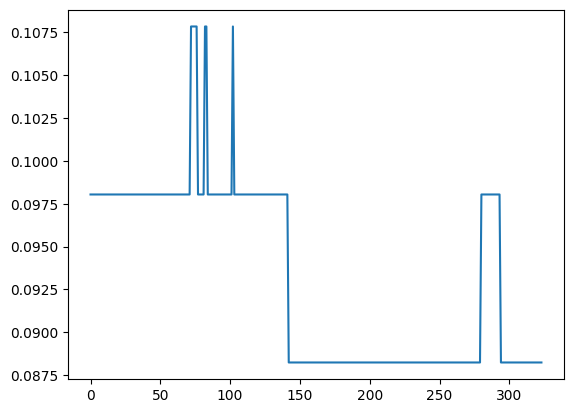

In [6]:
plt.plot(range(0,324),SimulationResults["ErrorVec"])

In [3]:
### Set Up ###
ErrorVecSimulation = []
HistoryVecSimulation = []

### Run Code ###
for i in range(1,2):

    ### Set Up ###
    print(i)

    ### Sequential Learning Process ###
    SimulationResults = OneIterationFunction(DataFileInput = ParameterVector.iloc[i]["Data"],
                                                    Seed = int(ParameterVector.iloc[i]["Seed"]),
                                                    TestProportion = ParameterVector.iloc[i]["TestProportion"],
                                                    CandidateProportion = ParameterVector.iloc[i]["CandidateProportion"],
                                                    SelectorType = globals().get(ParameterVector.iloc[i]["SelectorType"], None), 
                                                    ModelType = globals().get(ParameterVector.iloc[i]["ModelType"], None), 
                                                    DataArgs = ast.literal_eval(ast.literal_eval(ParameterVector.iloc[i]["DataArgs"])),
                                                    SelectorArgs = ast.literal_eval(ast.literal_eval(ParameterVector.iloc[i]["SelectorArgs"].replace("[","").replace("]",""))),
                                                    ModelArgs = ast.literal_eval(ast.literal_eval(ParameterVector.iloc[i]["ModelArgs"].replace("[","").replace("]","")))
                                                    )

    ### Append ###
    ErrorVecSimulation.append(SimulationResults["ErrorVec"])
    HistoryVecSimulation.append(SimulationResults["SelectionHistory"])

    ### Save ###
    filename = os.path.join(ParentDirectory, 
                "Results",
                str(ParameterVector.iloc[i]["Output"]))

    np.save(filename, np.array(ErrorVecSimulation))

    print("SAVED")

1
Iteration: 0
null
Finding Optimal Objective...
treefarms reported successful execution
training completed. Number of trees in the Rashomon set: 1953
{
  "false": {
    "false": {
      "complexity": 0.009999999776482582,
      "loss": 0.012500000186264515,
      "name": "Y",
      "prediction": "False"
    },
    "feature": 8,
    "name": "RM_3",
    "reference": 1.0,
    "relation": "==",
    "true": {
      "false": {
        "false": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "Y",
          "prediction": "False"
        },
        "feature": 5,
        "name": "NOX_3",
        "reference": 1.0,
        "relation": "==",
        "true": {
          "complexity": 0.009999999776482582,
          "loss": 0.0,
          "name": "Y",
          "prediction": "True"
        },
        "type": "rational"
      },
      "feature": 12,
      "name": "LSTAT_1",
      "reference": 1.0,
      "relation": "==",
      "true": {
        "complexity": 0